In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

C:\Users\SHREYA KUMARI\AppData\Local\Temp\ipykernel_26936\2820226328.py:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\SHREYA KUMARI\AppData\Local\Temp\ipykernel_26936\2820226328.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# LOAD DATA
sales_data=pd.read_csv('Adidas US Sales Datasets.csv')
sales_data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales/REVENUE(2021),Total Sales/REVENUE(2020),sales growth,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200",600000,529000,0.13,300000,0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000",500000,425733,0.17,150000,0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000",400000,389250,0.03,140000,0.35,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,382500,225629,0.70,133875,0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,540000,450000,0.20,162000,0.30,In-store


In [3]:
# cleaning the dataset
# handling missing values
# 1. handling missing values: use isnull() to identify missing values in ur dataset+ to count missing values in each column use sum()

# identify missing values
missing_values=sales_data.isnull()

# count missing values in each column
missing_count=sales_data.isnull().sum()

# to see output
sales_data.head()
print(missing_count)

#2. handling duplicates:

# to identify duplicate rows
duplicates=sales_data.duplicated()
    
# print all the duplicates
print(duplicates)

# to remove duplicate rows
sale_data=sales_data.drop_duplicates()
    
# to see output
sales_data.head()

#3. formatting issues: check for formatting issues such as inconsistent capitalization, leading/trailling spaces, or data types

# to remove leading and tralling spaces from string columns
sales_data['Retailer']=sales_data['Retailer'].str.strip().str.lower()
sales_data['Region']=sales_data['Region'].str.strip().str.lower()
sales_data['State']=sales_data['State'].str.strip().str.lower()
sales_data['City']=sales_data['City'].str.strip().str.lower()
sales_data['Product']=sales_data['Product'].str.strip().str.lower()
sales_data['Sales Method']=sales_data['Sales Method'].str.strip().str.lower()

# Clean the 'Total Sales/REVENUE(current period)' column and convert it to numeric
#sales_data['Total Sales/REVENUE(previous period)'] = sales_data['Total Sales/REVENUE(previous period)'].str.replace('$', '').str.replace(',', '').astype(float)

sales_data.head()




Retailer                     0
Retailer ID                  0
Invoice Date                 0
Region                       0
State                        0
City                         0
Product                      0
Price per Unit               0
Units Sold                   0
Total Sales/REVENUE(2021)    0
Total Sales/REVENUE(2020)    0
sales growth                 0
Operating Profit             0
Operating Margin             0
Sales Method                 0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales/REVENUE(2021),Total Sales/REVENUE(2020),sales growth,Operating Profit,Operating Margin,Sales Method
0,foot locker,1185732,01-01-2020,northeast,new york,new york,men's street footwear,$50.00,"1,200",600000,529000,0.13,300000,0.50,in-store
1,foot locker,1185732,02-01-2020,northeast,new york,new york,men's athletic footwear,$50.00,"1,000",500000,425733,0.17,150000,0.30,in-store
2,foot locker,1185732,03-01-2020,northeast,new york,new york,women's street footwear,$40.00,"1,000",400000,389250,0.03,140000,0.35,in-store
3,foot locker,1185732,04-01-2020,northeast,new york,new york,women's athletic footwear,$45.00,850,382500,225629,0.70,133875,0.35,in-store
4,foot locker,1185732,05-01-2020,northeast,new york,new york,men's apparel,$60.00,900,540000,450000,0.20,162000,0.30,in-store


In [4]:
# DATA ANALYSIS
# Calculate key metrices

# total sales(current):
total_sales=sales_data['Total Sales/REVENUE(2021)'].sum()
print('total sales of current period:')
print(total_sales)

#total sales(previous):
# cleaning
# Clean the 'Total Sales/REVENUE(current period)' column and convert it to numeric
#sales_data['Total Sales/REVENUE(previous period)'] = sales_data['Total Sales/REVENUE(previous period)'].str.replace('$', '').str.replace(',', '').astype(float)
Total_sales=sales_data['Total Sales/REVENUE(2020)'].sum()
print('total sales of previous period:')
print(Total_sales)

# average sales:
average_sales=sales_data['Total Sales/REVENUE(2021)'].mean()
print('average revenue/sales (current)=')
print(average_sales)

# overall sales growth
overall_sales_growth = ((total_sales -Total_sales ) / Total_sales) * 100
if overall_sales_growth>0:
    print(f"There is an increment in sales growth from 2020 to 2021, the total sales growth is: {overall_sales_growth:.2f}%")
    
else:
    print(f"There is decrement in sales growth from 2020 to 2021,the total sales growth= {overall_sales_growth:.2f}%")


total sales of current period:
899902125
total sales of previous period:
224025866
average revenue/sales (current)=
93273.4375
There is an increment in sales growth from 2020 to 2021, the total sales growth is: 301.70%


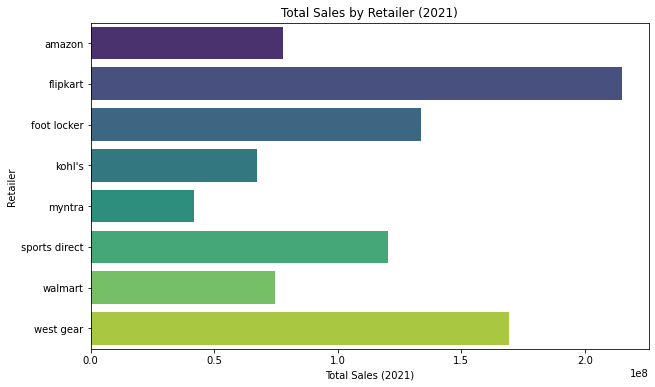

In [5]:
# DATA VISULIZATION
# this bar chart is build to comapre total sales of each retailer. will show which retailer has highest and lowest sales

# group the data by 'retailer' and calculate the sum of 'total sales/revenue(2021)' for each retailer
total_sales_by_retailer=sales_data.groupby('Retailer')['Total Sales/REVENUE(2021)'].sum().reset_index()

# now a bar chart can be created using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales/REVENUE(2021)', y='Retailer', data=total_sales_by_retailer, palette='viridis')
plt.xlabel('Total Sales (2021)')
plt.ylabel('Retailer')
plt.title('Total Sales by Retailer (2021)')
plt.show()


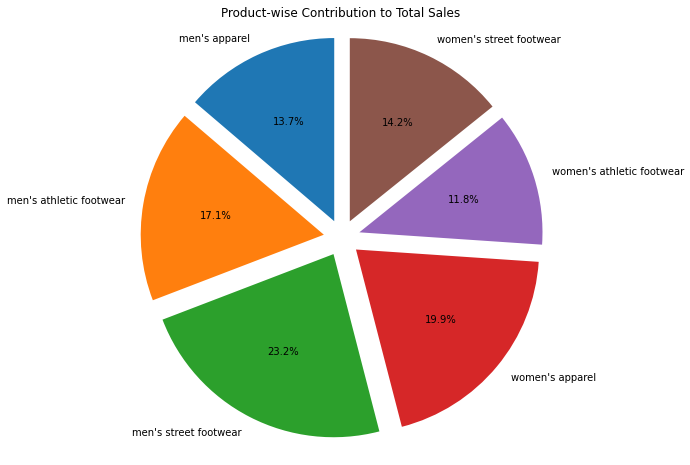

In [6]:
# contribution of each product to the total sales via bar chart
# kon sa product kitna bika
# exploaded pie plot
# contribution of each product to the total sales via bar chart
# kon sa product kitna bika
product_sales= sales_data.groupby('Product')['Total Sales/REVENUE(2021)'].sum().reset_index()

# Create labels for products and sizes for their respective sales
labels = product_sales['Product']
sizes = product_sales['Total Sales/REVENUE(2021)']

# Explode a slice (optional)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # This will explode the first slice slightly

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)
plt.axis('equal')  # Ensure the pie chart is circular
plt.title('Product-wise Contribution to Total Sales')
plt.show()


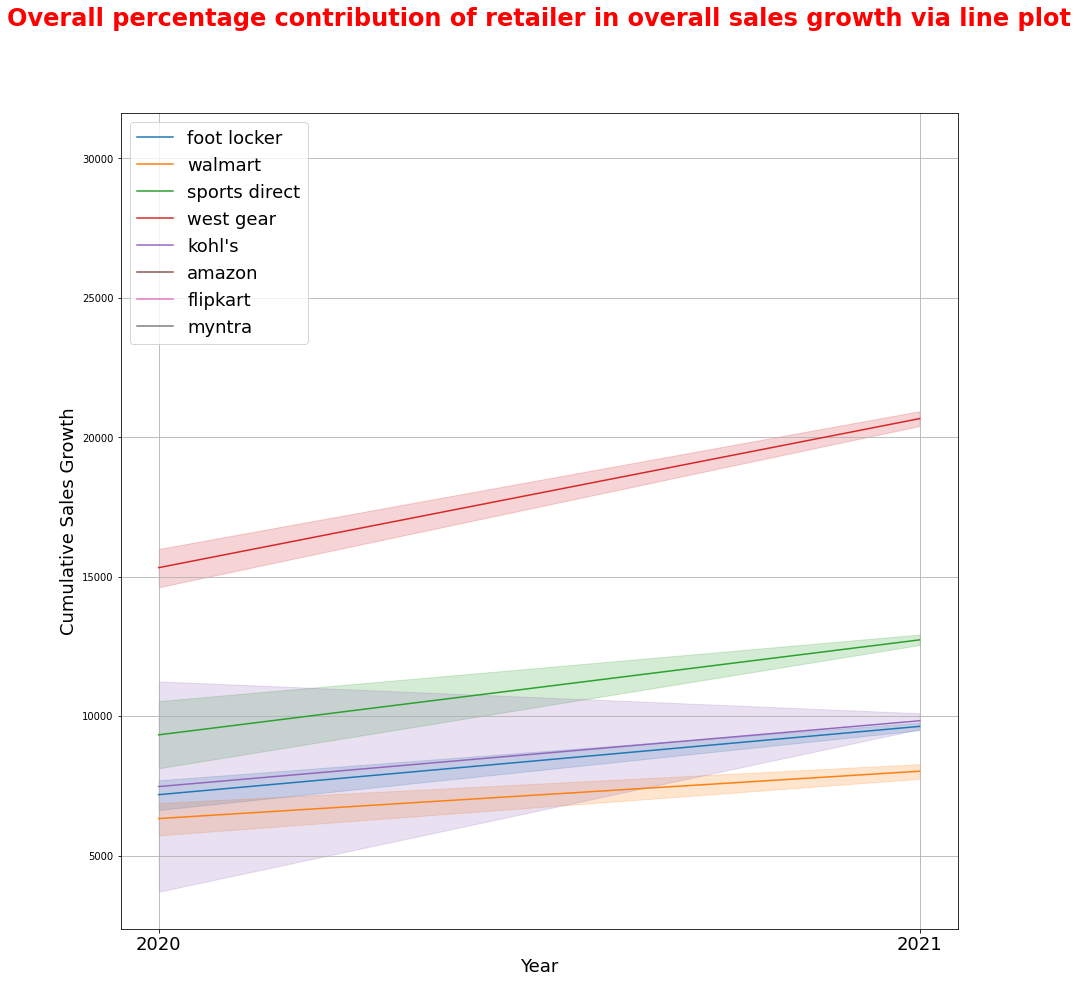

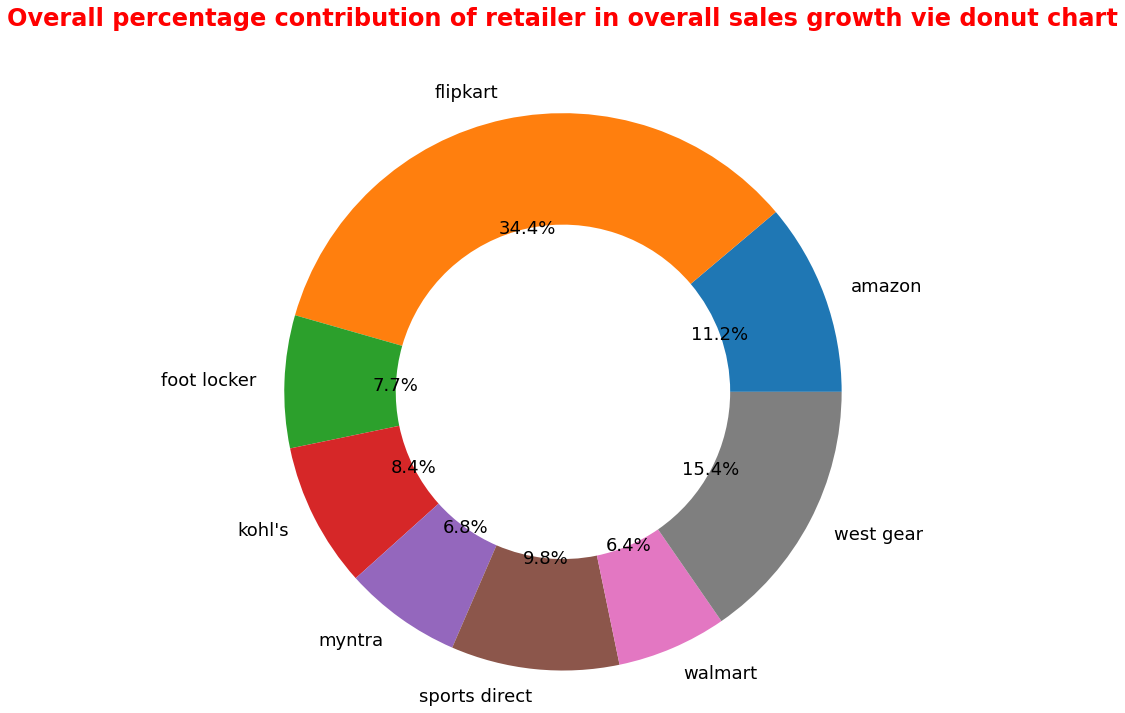

In [7]:
# OVERALL SALES GROWTH VIA LINE PLOT
# this plot will show the sales growth over the years for each retailer, this will help identify retailer with consistent growth and those with decling sales
# convert 'Invoice Date' column to datetime in case it's not already
sales_data['Invoice Date']=pd.to_datetime(sales_data['Invoice Date'],format='%d-%m-%Y')

# extract the year from the 'Invoice Data' and create a new 'Year' column
sales_data['Year']=sales_data['Invoice Date'].dt.year
#print(sales_data['Year'])

# group the 'retailer' and 'year', and calculate cumulative sales growth
sales_data['Cumulative Sales Growth']=sales_data.groupby('Retailer')['sales growth'].cumsum()

# Create a line plot for each retailer using lineplot
plt.figure(figsize=(15, 15))

sns.lineplot(
    data=sales_data,
    x='Year',
    y='Cumulative Sales Growth',
    hue='Retailer',
)

# Set axis labels, titles, etc.
plt.xlabel('Year',fontsize=18)
plt.ylabel('Cumulative Sales Growth',fontsize=18)
plt.title('Overall percentage contribution of retailer in overall sales growth via line plot', y=1.1, fontsize=24, color='red', fontweight='bold')

# customize the x-axis ticks to display years as integers, esse year decimal mai nahi aaega
# sales_data['Year']: this extracts the 'Year' column from my "sales_data" data frame,
#unique() is applied to the 'Year' column and it returns an array of unique values from the column
# pd.serirs(...) converts the arrya of unique years into a pandas series
# so, after this line of code, the 'years' series will contain all the unique years present in my 'Year' column.
years=pd.Series(sales_data['Year'].unique())
plt.xticks(years,years.astype(int),fontsize=18) # for x axis

#plt.yticks(fontsize=18)


# Adjust the legend location
plt.legend(loc='upper left',fontsize=18)

# Show the plot
plt.grid(True)
plt.show()

print()
print()

#---------------------------------------- via donut chart---------------------------------------
# overall sales growth via donut pie chart
# retailer k basis pr group divide kra aur hr ek retailer ka kitna contribution that overall sales growth mai

retailer=sales_data.groupby('Retailer')['sales growth'].sum().reset_index()

# Create labels for retailer and sizes for their respective contribution in total revenue
labels=retailer['Retailer']
sizes=retailer['sales growth']
plt.figure(figsize=(11, 11))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width':0.4},textprops={'fontsize': 18})
plt.axis('equal')
plt.title('Overall percentage contribution of retailer in overall sales growth vie donut chart', fontsize=24,y=1.1, color='red',fontweight='bold')
plt.show()



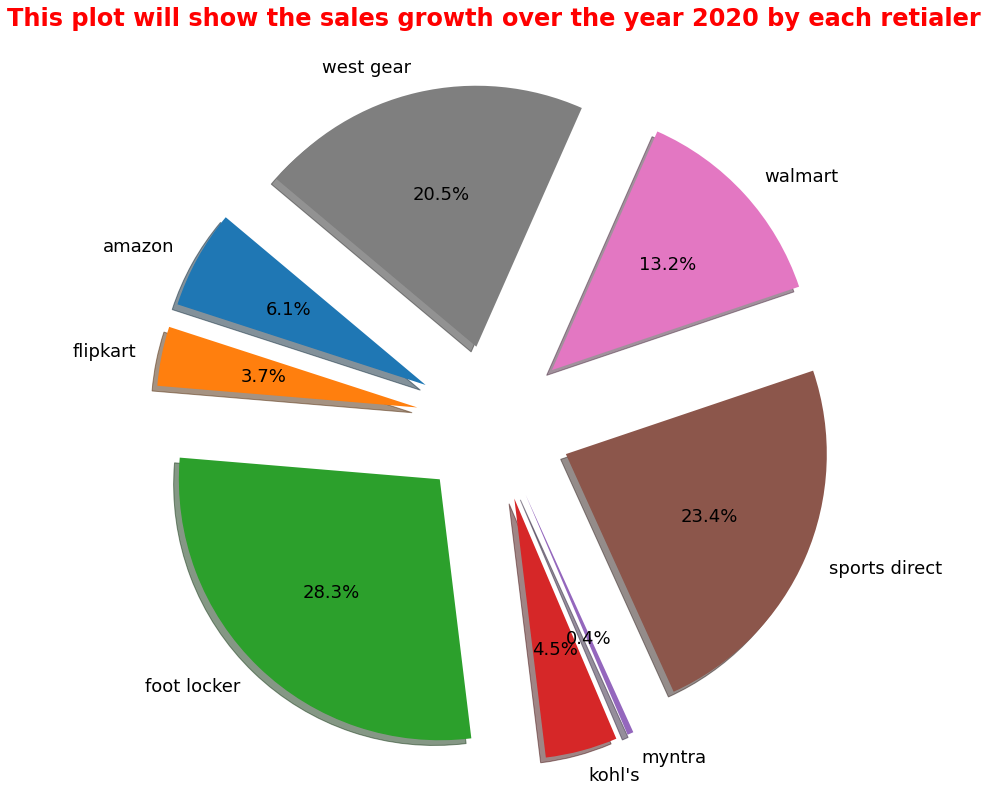

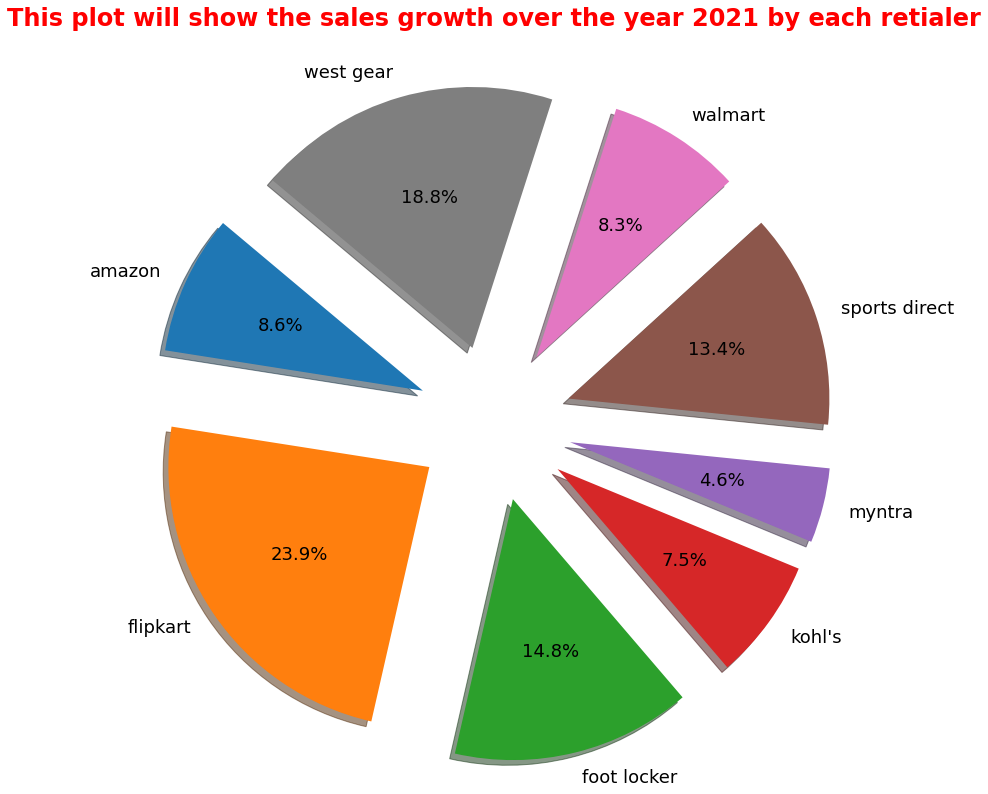

In [8]:
#----------------------------------------2020 YEAR------------------------------------------------
# all 8 retailer ne 2020 mai kitna product sell kra
# Motive/Aim: The purpose of this code is to visualize the distribution of total sales (revenue) for each retailer in the year 2020.
#It calculates the total sales (revenue) for each retailer based on the "Total Sales/REVENUE(2020)" column in
#the dataset and creates a pie chart to show how much each retailer contributed to the total sales in 2020.

# 3D PIE CHART

# group by 'Retailer' and sum up 'total revenue'
retailer=sales_data.groupby('Retailer')['Total Sales/REVENUE(2020)'].sum().reset_index()

labels=retailer['Retailer']
sizes=retailer['Total Sales/REVENUE(2020)']
explode = (0.3, 0.3, 0.3, 0.3,0.3,0.3,0.3,0.3)  # Explode slices for a 3D effect

# Create a pie chart with shadow and explode options
plt.figure(figsize=(12, 12))# Adjust the figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True,textprops={'fontsize': 18})

# Set the title
plt.title('This plot will show the sales growth over the year 2020 by each retialer', fontsize=24,color='red',y=1.1, fontweight='bold')

# Display the chart
plt.show()
print()
#----------------------------------------2021 YEAR------------------------------------------------
# all 8 retailer ne 2021 mai kitna product sell kra
# Motive/Aim: The purpose of this code is to visualize the distribution of total sales (revenue) for each retailer in the year 2020.
#It calculates the total sales (revenue) for each retailer based on the "Total Sales/REVENUE(2020)" column in
#the dataset and creates a pie chart to show how much each retailer contributed to the total sales in 2020.

# 3D PIE CHART

# group by 'Retailer' and sum up 'total revenue'
retailer=sales_data.groupby('Retailer')['Total Sales/REVENUE(2021)'].sum().reset_index()

labels=retailer['Retailer']
sizes=retailer['Total Sales/REVENUE(2021)']
explode = (0.3, 0.3, 0.3, 0.3,0.3,0.3,0.3,0.3)  # Explode slices for a 3D effect

# Create a pie chart with shadow and explode options
plt.figure(figsize=(12, 12))# Adjust the figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True,textprops={'fontsize': 18})

# Set the title
plt.title('This plot will show the sales growth over the year 2021 by each retialer', fontsize=24,color='red',y=1.1, fontweight='bold')

# Display the chart
plt.show()


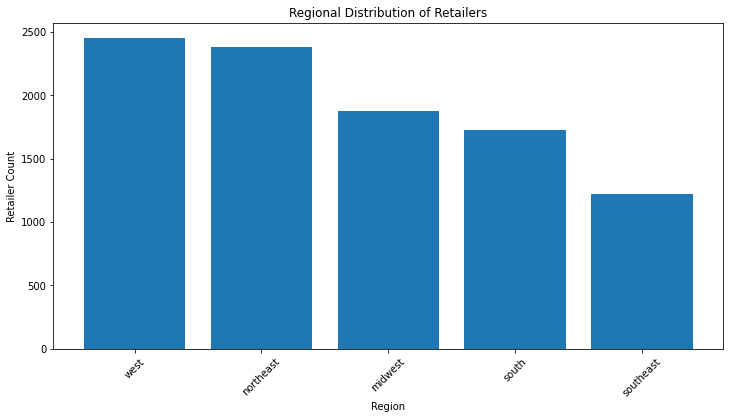

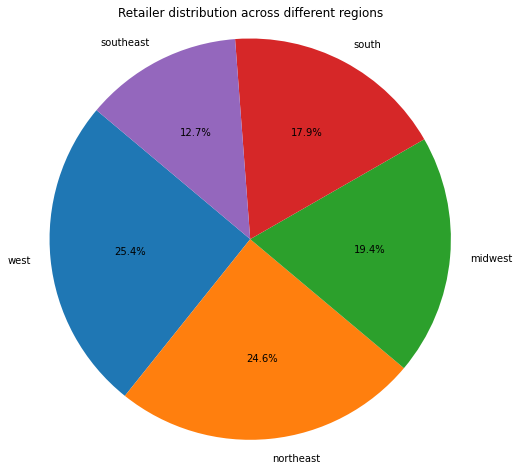

In [9]:
# this code aims to create a bar chart that helps visualize how retailers are distributed across different regions or areas, providing insights into the regional distribution of retail activity
# kis area mai retail activity zada ho rhe hai
# BAR CHART
# Group by region and count the number of retailers in each region
region_distribution = sales_data['Region'].value_counts().reset_index()

# Rename columns for clarity
region_distribution.columns = ['Region', 'Retailer Count']

# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(region_distribution['Region'], region_distribution['Retailer Count'])
plt.xlabel('Region')
plt.ylabel('Retailer Count')
plt.title('Regional Distribution of Retailers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# PIE CHART
# Group by region and count the number of retailers in each region
region_distribution = sales_data['Region'].value_counts().reset_index()

regions=region_distribution['index'].tolist()
retailer_count=region_distribution['Region'].tolist()

plt.figure(figsize=(8,8))
plt.pie(retailer_count,labels=regions,autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensure the pie chart is circular
plt.title('Retailer distribution across different regions')
plt.show()

By analyzing the distribution of retailers across regions can inform strategic decison related to:
-> market expansion
->competitive analysis
-> supply chain optimization
->localised marketing
-> resource allocation
-> risk management

<Figure size 864x432 with 0 Axes>

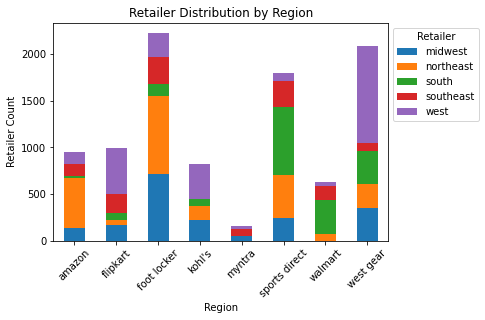

In [10]:
# POPULARITY OF RETAILERS OVER DIFFERENT REGIONS OF US

# Assuming I have a DataFrame 'sales_data' with columns 'Retailer' and 'Region'
# Group by both 'Retailer' and 'Region' and count the number of occurrences
retailer_region_distribution = sales_data.groupby(['Retailer', 'Region']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
retailer_region_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Retailer Count')
plt.title('Retailer Distribution by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Retailer', bbox_to_anchor=(1, 1))
plt.show()


By plotting which retailer is famous in which region provids insights into:
-> retailer's popularity which helps in identifying consumers prferences in more detail therefore a company can tailor it's marketing+promotion+product distribution accordingly.

-> market segmentation:a by analyzing popularity of retailer in distributed region can help a company segment their target market effectively therefore they can tailor their marketing strategies and product offerings according to preference of consumers

-> competitive analysis: by analizing which retailer is dominant in which region can help a company see who are their competitors + company A can compare its retailer with company B retailer, therefore company A can analyze its weaknesses and work on that by taking decisions and making strategies.

->partnership and collaboration:
by analysing famous retailers of different regions can also give an option of partnership and collaboration. this can be benefitial for both the company who wants to collaborate and the retailer with whome company want to sign aggrement. the deal can be that retailer have alo to do promotion+marketing+product distribution of that company.

->expansion opportunities for retailers:
if retailer A famous in his region he can do research to analyse regions where they feel they have strong base (by analysing the data) can expand their business in that region also.


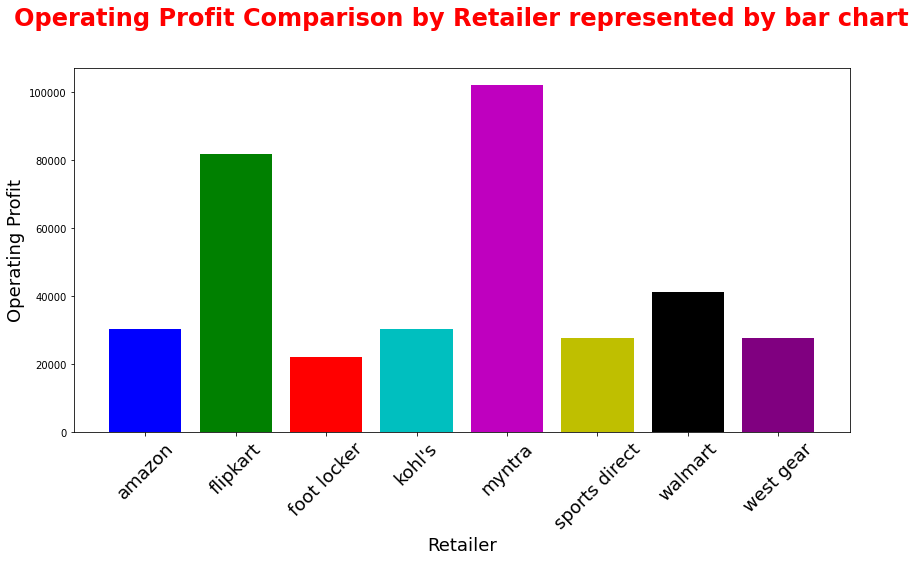

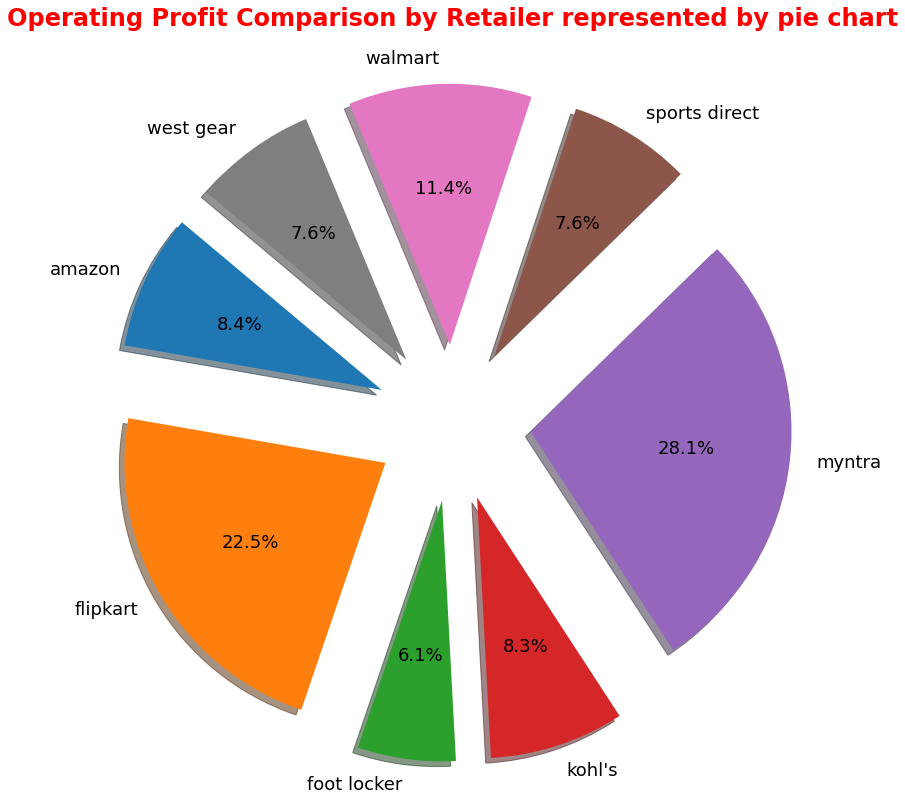

In [11]:
# OPERATING PROFIT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Retailer' and calculate the mean operating profit for each retailer
#We take the mean because we want to compare the average operating profit of each retailer.
profit_comparison = sales_data.groupby('Retailer')['Operating Profit'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Extract retailer names and corresponding operating profits
retailers = profit_comparison['Retailer']
profits = profit_comparison['Operating Profit']

# Create a list of colors for bars (optional)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

# Create the grouped bar chart
plt.bar(retailers, profits, color=colors)

# Customize the chart labels and title
plt.xlabel('Retailer', fontsize=18)
plt.ylabel('Operating Profit',fontsize=18)
plt.title('Operating Profit Comparison by Retailer represented by bar chart', fontsize=24,color='red',y=1.1, fontweight='bold')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45,fontsize=18)

# Show the chart
plt.tight_layout()  # Ensures labels and titles fit within the figure
plt.show()

#--------------------------------------------------------------------

#3D PIE CHART
# group by 'Retailer' and take mean of 'operating profit'
profit_comparison = sales_data.groupby('Retailer')['Operating Profit'].mean().reset_index()

#create a pie chart with shadow and explode option
labels=profit_comparison['Retailer']
sizes=profit_comparison['Operating Profit']
explode = (0.3, 0.3, 0.3, 0.3,0.3,0.3,0.3,0.3)  # Explode slices for a 3D effect

# Create a pie chart with shadow and explode options
plt.figure(figsize=(12, 12))# Adjust the figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True,textprops={'fontsize': 18})

# Set the title
plt.title('Operating Profit Comparison by Retailer represented by pie chart', fontsize=24,color='red',y=1.1, fontweight='bold')

# Display the chart
plt.show()

NOTE:

Profitability is not solely determined by sales growth percentage. Profitability takes into account various financial metrics such as revenue, expenses, profit margins, and net income. A retailer with high sales growth might still have low profitability if their expenses are high or if their profit margins are slim.

To assess which retailer is more profitable, you should consider other financial metrics like operating profit, net profit, or profit margin. Sales growth percentage alone does not provide a complete picture of profitability. Additionally, profitability can vary by year, so it's essential to analyze multiple financial metrics and trends over time to make a comprehensive assessment.

If you have access to financial data such as operating profit, net profit, or profit margin for each retailer, you can create a more accurate comparison of their profitability.

WHAT IS OPERATING PROFIT?
- Operating profit, also known as operating income or operating earnings, is a financial metric that represents the profit a company generates from its core business operations.


- It measures the profitability of a company's primary activities, excluding income from secondary sources like investments or one-time gains. Operating profit is a key indicator of a company's operational efficiency and financial health.


- Calculate your operating expenses, which include costs such as rent, utilities, salaries, marketing, and other general business expenses.


Operating Profit = Gross Profit - Operating Expenses

Here's the basic formula for calculating operating profit:

Operating Profit = Total Revenue - Total Operating Expenses


WHAT IS OPERATING MARGIN?
- Operating Margin is a financial metric that measures a company's efficiency in managing its operating expenses relative to its revenue.


- It is expressed as a percentage and indicates the percentage of revenue that remains as operating profit after deducting all operating expenses (such as cost of goods sold, salaries, and administrative expenses). 


- operating expences include costs such as rent,utilities,salaries,marketing,and other general business expenses.


- A higher operating margin generally indicates that a company is able to generate more profit from its core operations.

- core operations refers to primary sctivities and functions that a company engages in to generate revenue and achieve its  business objectives. core operations belong in to-do list of any company because these need to be completed at any cost to achieve success. 
core operation include:
prduction or manufacturing of goods, 
sales and marketing activities for reaching cunstomers,

service delivery includes managing clients, client relationship and ensuring customer satisfaction,

supply chain management includes sourcing material,inventory management and distribution, 

research and development involves development of new products or technologies as their aim is to improve existing products or create new one

finance and accounting include managing finance,budgeting reporting,and accountings are fundamental for any business.

human resource(HR) operations include hirirng,training and managing emoplyees.

Operating Margin = (Operating Profit / Revenue) * 100


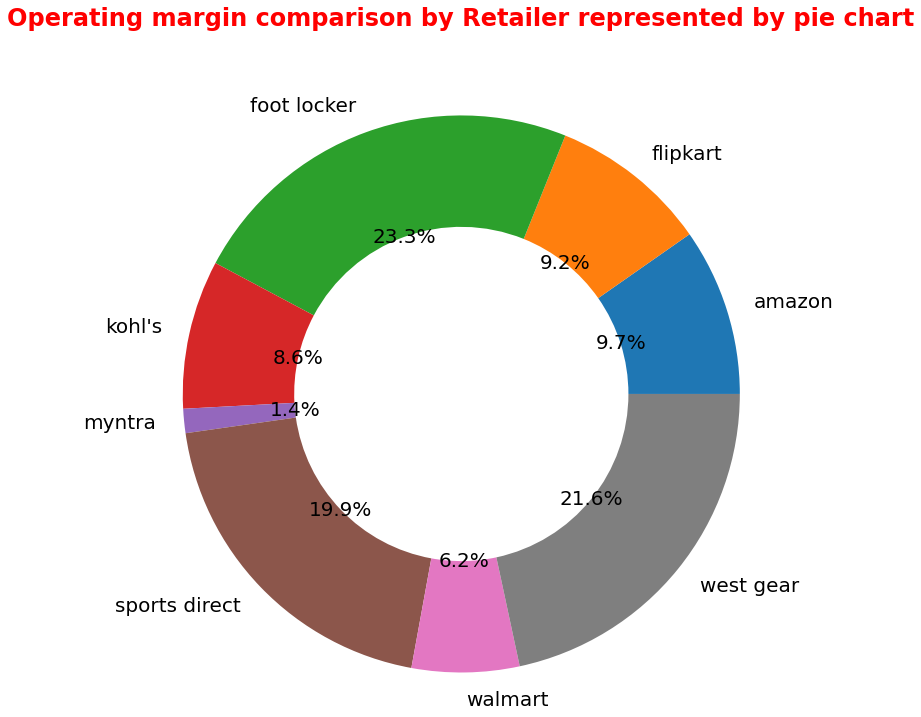

In [12]:
# OPERATING MARGIN ANALYSIS
retailer=sales_data.groupby('Retailer')['Operating Margin'].sum().reset_index()

# Create labels for retailer and sizes for their respective contribution in total revenue
labels=retailer['Retailer']
sizes=retailer['Operating Margin']
plt.figure(figsize=(11, 11))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width':0.4},textprops={'fontsize': 20})
plt.axis('equal')
plt.title('Operating margin comparison by Retailer represented by pie chart', fontsize=24,y=1.1, color='red',fontweight='bold')
plt.show()

In [13]:
# ORIGINAL
#import dash
#from dash import dcc, html, Input, Output
#import pandas as pd
#import plotly.express as px

# Assuming your dataset is loaded into a DataFrame called 'sales_data'
sales_data = pd.read_csv('Adidas US Sales Datasets.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Create a function to categorize products into ProductCategory and ProductSegment
def categorize_product(product_name):
    if "Men's Street Footwear" in product_name:
        return "Men's Street Footwear"
    elif "Women's Street Footwear" in product_name:
        return "Women's Street Footwear"
    elif "Men's Apparel" in product_name:
        return "Men's Apparel"
    elif "Women's Apparel" in product_name:
        return "Women's Apparel"
    elif "Women's Athletic Footwear" in product_name:
        return "Women's Athletic Footwear"
    elif "Men's Athletic Footwear" in product_name:
        return "Men's Athletic Footwear"
    else:
        return "Other"

# Apply the categorization function to create 'ProductCategory' column
sales_data['ProductCategory'] = sales_data['Product'].apply(categorize_product)

# Initialize the Dash app
app = dash.Dash(__name__)

# Create the layout of the dashboard
app.layout = html.Div([
    html.H1("Sales Performance Analysis Dashboard for 2021"),
    dcc.Dropdown(
        id='product-category-dropdown',
        options=[{'label': category, 'value': category} for category in sales_data['ProductCategory'].unique()],
        value=sales_data['ProductCategory'].unique()[0],
        multi=False
    ),
    
    dcc.Graph(id='sales-bar-chart'),
])
    

# Define the callback to update the bar chart
@app.callback(
    Output('sales-bar-chart', 'figure'),
    [Input('product-category-dropdown', 'value')]
)
def update_sales_bar_chart(selected_category):
    filtered_data = sales_data[sales_data['ProductCategory'] == selected_category]
    
    fig = px.bar(filtered_data, x='Product', y='Total Sales/REVENUE(2021)',
                 title=f'Sales Performance for {selected_category}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)